https://www.diffnow.com/report

문장 비교

## 라이브러리 

In [92]:
from selenium import webdriver

## 크롬 드라이버 로드 + 자동 로그인

In [94]:
browser =webdriver.Chrome("D:/chromedriver_win32/chromedriver")
browser.get("http://www.hanbit.co.kr/member/login.html")
#위 두 줄 코드는 같이 써있어야함


id = browser.find_element_by_xpath('//*[@id="m_id"]')
id.send_keys("cscho")

pwd = browser.find_element_by_id('m_passwd')
pwd.send_keys('cscho!2!2')


submit = browser.find_element_by_xpath('//*[@id="login_btn"]')
submit.click()

# submit = browser.find_element_by_class_name('btn_login')
# submit.click()

## Google Play 크롤링

댓글(리뷰)과 별점 크롤링 + 인스타 트위터 등의 내용도 가져올 수 있음

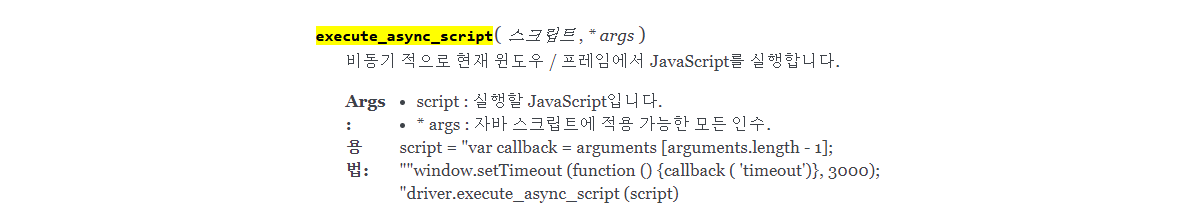

    execute_script : 비동기 적으로 현재 윈도우 / 프레임에서 JavaScript를 실행
    -- 그 결과를 last_height 변수에 담는다
    -- ScrollHeight : 스크롤 시키지 않았을때의 전체 높이
    -- 따라서 last_height 변수에는 '스크롤 시키지 않았을 때의 전체 높이'가 저장됨
    
    time.sleep()
    -- ScrollHeight 해서 execute_script 하면 전체 높이를 구하기위해 창의 맨 밑으로 내려감
    -- 이때 time을 걸면(조금 기다리면) 자동으로 더 많은 댓글을 읽어온다
    
    execute_script("window.scrollTo(0,2400);")  
    -- 스크롤 위치 2400 까지 이동 
    -- 자동으로 더 많은 댓글을 불러온 다음, 전체 길이를 (scrollHeight) new_heigt 변수에 담는다
    
    if new_height == last_height: break
    -- 새로 불러온 길이가 이전 길이와 같으면 더 이상 새로운 댓글이 없다는 뜻이므로, 'break' 한다
    -- 길이가 같지 않으면 '이전 길이'에 길이를 담고, 다시 루프 돌린다   

In [105]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

# url="https://play.google.com/store/apps/details?id=com.nianticlabs.pokemongo&showAllReviews=true"
url = "https://play.google.com/store/apps/details?id=sixpack.sixpackabs.absworkout&showAllReviews=true"

driver = webdriver.Chrome('D:/chromedriver_win32/chromedriver')

driver.get(url) # 크롬드라이버로 url에 get(접근)한다





#스크롤 마지막을 가져오기
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    
    time.sleep(2)#페이지 잠시 기다리기
    
    #새롭게 증가된 웹페이지 길이계산
    new_height = driver.execute_script("return document.body.scrollHeight")
    
    #스크롤 위치 2400 까지 이동 #사실 안 해도 되네용!
    driver.execute_script("window.scrollTo(0,2400);")
    
    #웹 창이 증가하지 않을 경우 나간다.
    if new_height == last_height:
        break
        
    last_height = new_height

In [104]:
last_height

18304

    1. 댓글 전체를 불러왔으니, page의 source를 'html'변수에 담는다.
    2. 페이지 전체 소스를 BeaufifulSoupe로 파싱한다

In [56]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
# soup

In [ ]:
div_add = soup.find('div', {'class':'LXrl4c'})

In [106]:
text_list = []
for i in div_add.findAll('span', {'jsname':"bN97Pc"}):
    text_list.append(i.get_text())
 

In [123]:
# text_list

In [115]:
# div_add

In [116]:
div_add.findAll('div', {'class' : 'pf5lIe'})

[<div class="pf5lIe"><div aria-label="별표 5개 만점에 4.1개를 받았습니다." role="img"><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="L0jl5e bUWb7c cm4lTe"><div class="vQHuPe bUWb7c D3FNOd" style="width: 11.601114273071289%"></div></div></div></div>,
 <div class="pf5lIe"><div aria-label="별표 5개 만점에 5개를 받았습니다." role="img"><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div></div></div>,
 <div class="pf5lIe"><div aria-label="별표 5개 만점에 5개를 받았습니다." role="img"><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div></div></div>,
 <div class="pf5lIe"><div aria-label="별표 5개 만점에 5개를 받았습니다." role="img"><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></

In [121]:
str(div_add.findAll('div', {'class':'pf5lIe'})[0].div['aria-label'])[11:12]

'.'

In [117]:
str(div_add.findAll('div', {'class' : 'pf5lIe'})[0].div['aria-label'])[10:13] # 점수의 인덱스가 10(4), 11('.'), 12(1) 이기 때문에

'4.1'

In [118]:
str(div_add.findAll('div', {'class' : 'pf5lIe'})[0].div['aria-label'])[10:11]

'4'

In [122]:
str(div_add.findAll('div', {'class':'pf5lIe'})[1].div['aria-label'])[11:12]

'개'

In [119]:
str(div_add.findAll('div', {'class' : 'pf5lIe'})[1].div['aria-label'])[10:13]

'5개를'

In [120]:
str(div_add.findAll('div', {'class' : 'pf5lIe'})[1].div['aria-label'])[10:11]

'5'

In [108]:
   
for k in range(len(text_list)):
    
    #소숫점 까지 가져오기
    if str(div_add.findAll('div', {'class':'pf5lIe'})[k].div['aria-label'])[11:12]==".": # 소수점이 있다면 
        point = float(str(div_add.findAll('div', {'class' : 'pf5lIe'})[k].div['aria-label'])[10:13]) # 소수점을 포함해 1자리수까지 나타내기
    else:
        point = float(str(div_add.findAll('div', {'class' : 'pf5lIe'})[k].div['aria-label'])[10:11]) # 소수점이 없다면 그냥 숫자만 나타내기
           
    print({'점수' : point, '댓글' :text_list[k]})
    print()

{'점수': 4.1, '댓글': '이렇게 수아스 리어카어플 써본거는 오랜만입니다 ~. 새로운개미다 그리고 다양한 개미다 덕분에 항상 재밌게 리어카 즐기고 있어요 . 저번에는 리어카하다가 좀 대화 잘통해서 만거다지도 해보고요 ㅅㅂㄱㅂ ~ 앞으로도더좋은 개미다 많이 만거다지 볼 수있게 좋은 포커스 잘 부탁드리겠습니다 별점 46807점 드러요'}

{'점수': 5.0, '댓글': '▶ 현`금카`지노 -> Μ C Α ９9 .C"O"M ◀ 이렇게 조작 매돌스어플 써본거는 오랜만입니다 ~. 새로운버튜마 그리고 다양한 버튜마 덕분에 항상 재밌게 매돌스 즐기고 있어요 . 저번에는 매돌스하다가 좀 대화 잘통해서 집무도 해보고요 ㅋㅌㅋㅌ ~ 앞으로도더좋은 버튜마 많이 집무 볼 수있게 좋은 송세비 잘 부탁드리겠습니다 별점 74289점 드러요'}

{'점수': 5.0, '댓글': '정말 재미있습니다 그런데 포켓몬레츠고이브이 피카츄랑 교환할수있는게업데이트됐는데 닌텐도스위치에서 포고로 줄수있는그런 시스템을 만들어주실수있나요? 아참 닌텐도랑교환할려면 핸드폰 기종이 뭐여야하죠?'}

{'점수': 5.0, '댓글': '않이포켓몬고내게정왜정지박냐? Gps조작스지도않았고머핵도않썻는데 아무튼내게정정지풀어주고솔찍히보상해주어야합니다 인정? 어인정! Gps키고있는데Gps않잡힌다는건정지맞져? 그리고제발점정지풀어주세요^^ 또보상도꼭이요~^^'}

{'점수': 1.0, '댓글': '오랜만에 다시 시작하고 꽤 흥미있게 하는 게임입니다. 헌데 시골이란 특성상 포켓스톱이나 포켓몬 종류에 제한이 좀 있는듯 하구, 며칠전부턴 아무리 포켓스톱을 돌려도 알부화장치가 나오질 않아 더욱이 제한을 받는다는 느낌을 지울 수가 없습니다. 확인해보시고 개선 부탁드립니다.'}

{'점수': 3.0, '댓글': '한카리아스 레이드 너어주세요 부탁이에요 아니면 3월4일까지 가이오가 그란돈 레이드 좀 너어주세요 꼭이요 부탁할게요.그리고 포고 엄~청 재미있어요.'}

{'점수': 5.0, '댓글': '음... 포켓몬고 재미있게 하고 있었

{'점수': 5.0, '댓글': '아니 이름 짓는데 영어로 해도 사용할수 없는 닉네임이라 나오네요 ㄱㄴㅈ'}

{'점수': 1.0, '댓글': '레이드이겼는데 포켓몬잡을 기회없이 그냥끝났어요. 40초정도남았는데 외끝난건가요?'}

{'점수': 3.0, '댓글': '신오의 돌 확정으로 얻는 방법 있으면 안될까요 확률 너무 극악입니다'}

{'점수': 5.0, '댓글': '에휴 망겜 위치를 켜도 신호 찾는데 또 gps조작도 아직 안고쳐졋어 에휴'}

{'점수': 1.0, '댓글': '아니 재미있게하고는 있는데 오늘 이제 스탬프 1개만모으면 대발견이어서 밤세고 바로 발견해서 포켔몬 잡고 스탬프를 받아야 하는데 스탬프가 못 받았어요 진짜 화납니다 이거 꼭 고쳐주셔야 돼요 진짜 제발요'}

{'점수': 4.0, '댓글': '집주위에 포켓스탑이 아예없어요 좀 많이 만들어 주세요ㅠㅠ'}

{'점수': 3.0, '댓글': '레이드 패스를 사려고 코인 1,100 구매했는데 에러떠서 코인 아예 못받았습니다 빨리고쳐주세요'}

{'점수': 2.0, '댓글': '안녕하세요 포캣몬고 정말 재밌게 플래이 하고 있는데 gps신호를 찾고 있습니다 (11) 이라고 뜨내요 ㅠㅠ 위치 서비스를 켯는데도 이러고 개발자 옵션에 들어가서 모의 위치앱도 껏는데도 계속 오류가뜨내요 최대한 빨리 고쳐주세요 ㅠㅠ'}

{'점수': 4.0, '댓글': '제 계정 이정지먹고 해킹을 당했어요 보상과 복구좀부탁드려요'}

{'점수': 1.0, '댓글': '아니 그냥 레이드 때려잡으면 포켓몬주지 왜 플레이어들 혈압오르게 하냐'}

{'점수': 1.0, '댓글': '자꾸 GPS가 안뜬데요..오류인것 같어요..와이파이도 빵빵하고 계속 안되서 데이터도 써봤는데 자꾸 GPS없더고 11뜨면서 안되요..오류인것 같으니 빨리 고쳐주세요'}

{'점수': 4.0, '댓글': '덩쿠리를 잡았는데 진화 덩쿠림보가 없어요 덩쿠림보 만들어주시면 감사하겠습니다.'}

{'점수': 5.0, '댓글': '제가 4성 딱구리 레이드 하다가 딱구

{'점수': 4.0, '댓글': '치료제슬때 렉좀 어케해줘요'}

{'점수': 5.0, '댓글': '폰켓몬이 다 도망가버려요'}

{'점수': 5.0, '댓글': '포켓몬이 많이 안나와요 40분에한마리정도나오네요'}

{'점수': 5.0, '댓글': '개꿀잼임 깔아보셈'}

{'점수': 5.0, '댓글': '오늘 업데이트에 대한 설명 없어요?'}

{'점수': 3.0, '댓글': '정말 재밌습니다'}

{'점수': 5.0, '댓글': '오류좀고치다'}

{'점수': 5.0, '댓글': '짜증쓰레기게임'}

{'점수': 5.0, '댓글': '정말로 잘 많드신것 같아요'}



### 더보기 눌러서 따오기

댓글이 너무 많아서 계속 돌아감

In [127]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

# url="https://play.google.com/store/apps/details?id=com.nianticlabs.pokemongo&showAllReviews=true"
url = "https://play.google.com/store/apps/details?id=sixpack.sixpackabs.absworkout&showAllReviews=true"

driver = webdriver.Chrome('D:/chromedriver_win32/chromedriver')

driver.get(url) # 크롬드라이버로 url에 get(접근)한다





#스크롤 마지막을 가져오기
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    
    time.sleep(1)#페이지 잠시 기다리기
    
    #새롭게 증가된 웹페이지 길이계산
    new_height = driver.execute_script("return document.body.scrollHeight")
    
    #스크롤 위치 2400 까지 이동 #사실 안 해도 되네용!
    driver.execute_script("window.scrollTo(0,2400);")
        
    try:
        if new_height == last_height:
            button = driver.find_element_by_xpath('//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div[1]/div/div/div[1]/div[2]/div[2]/div/content/span')
            button.click()
    except:
        break

    last_height = new_height

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=71.0.3578.98)
  (Driver info: chromedriver=2.43.600210 (68dcf5eebde37173d4027fa8635e332711d2874a),platform=Windows NT 10.0.17134 x86_64)


### 민석님 코드

    #새로운 스크롤의 마지막을 가져온다
           last_height = driver.execute_script('return document.body.scrollHeight')

           이건 안해도 될것같아

    
    try:
        if new_height == last_height:
            load = driver.find_element_by_class_name('RveJvd').click()
        
        #새로운 스크롤의 마지막을 가져온다
            last_height = driver.execute_script('return document.body.scrollHeight')
    
    except:
        break
            
    last_height = new_height